In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

In [2]:
df = pd.read_pickle('../data/pkl/raw_games_5yrs.pkl')

In [3]:
df['GAME_DATE'] = pd.to_datetime(df['GAME_DATE'])

In [4]:
# df = df[df['GAME_DATE'] > "2022-09-01"].sort_values(by='GAME_DATE', ascending=False)

In [5]:
# games.groupby('TEAM_ID').apply(lambda x: x)

In [6]:
df.reset_index(drop=True, inplace=True)

In [7]:
map_id_name = df[['TEAM_ID', 'TEAM_NAME']].drop_duplicates().reset_index(drop=True)

In [8]:
map_id_name

,TEAM_ID,TEAM_NAME
0,1610612737,Atlanta Hawks
1,1610612738,Boston Celtics
2,1610612739,Cleveland Cavaliers
3,1610612740,New Orleans Pelicans
4,1610612741,Chicago Bulls
5,1610612742,Dallas Mavericks
6,1610612743,Denver Nuggets
7,1610612744,Golden State Warriors
8,1610612745,Houston Rockets
9,1610612746,LA Clippers


In [9]:
df.dtypes.value_counts()

int64             13
float64            9
object             5
int32              1
datetime64[ns]     1
dtype: int64

In [10]:
feat_categorical_nunique = df.select_dtypes(include='object').nunique()

In [11]:
feat_categorical_nunique

SEASON_ID              19
TEAM_ABBREVIATION      30
TEAM_NAME              30
MATCHUP              1777
WL                      2
dtype: int64

In [12]:
df.sort_values(['GAME_DATE', 'GAME_ID', 'HOME_TEAM'], ascending=[False, False, False], inplace=True)

## REMOVING SINGLE GAME ROWS

In [13]:
value_counts = df['GAME_ID'].value_counts()

In [14]:
value_counts

22200973      2
21900424      2
21900427      2
21900428      2
21900429      2
             ..
21801044      1
21900107      1
1622200006    1
1522200001    1
12100027      1
Name: GAME_ID, Length: 6999, dtype: int64

In [15]:
unique_values = value_counts[value_counts == 1].index.tolist()

In [16]:
unique_values

[21900024,
 1521900020,
 21900020,
 1321900006,
 1622100004,
 22100054,
 21801185,
 11900070,
 1621900004,
 1522100022,
 21900021,
 11900067,
 12100046,
 1522100017,
 21900556,
 1521900004,
 21900009,
 12100038,
 21801166,
 21900006,
 21900010,
 21900011,
 21900013,
 12200002,
 12200008,
 1522100006,
 1521900006,
 1522100004,
 1521900001,
 21801155,
 21801172,
 21900001,
 21800507,
 1521900021,
 22100060,
 1521900009,
 11900064,
 11900047,
 21801192,
 11900012,
 1521900058,
 11900021,
 11900020,
 12100012,
 12100010,
 11900018,
 1521900067,
 1521900068,
 41800132,
 1522100063,
 12100006,
 41800143,
 41800222,
 22100009,
 11900011,
 1521900054,
 21900694,
 11900009,
 12100001,
 11900008,
 11900007,
 1521900076,
 1521900077,
 41800156,
 1522100068,
 11900004,
 11900001,
 1521900079,
 1521900080,
 21900601,
 11900025,
 22100031,
 1521900030,
 21801207,
 12100052,
 21801194,
 1521900032,
 21801195,
 21801196,
 21801197,
 1621900001,
 21900568,
 12200025,
 11900057,
 1521900034,
 1522100034

In [17]:
df = df[~df['GAME_ID'].isin(unique_values)]

In [18]:
df = df.reset_index(drop=True)

## PREPROCESS

In [19]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [20]:
scaler = MinMaxScaler()

In [21]:
selected_columns = ['FG_PCT', 'FG3_PCT', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF']

In [22]:
df[selected_columns] = scaler.fit_transform(df[selected_columns])

In [23]:
df

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,HOME_TEAM
0,22022,1610612764,WAS,Washington Wizards,22200973,2023-03-05,WAS vs. MIL,L,239,111,...,0.689655,0.466667,0.666667,0.325581,0.363636,0.10,0.25000,0.333333,-6.0,1
1,22022,1610612749,MIL,Milwaukee Bucks,22200973,2023-03-05,MIL @ WAS,W,240,117,...,0.275862,0.511111,0.470588,0.534884,0.227273,0.30,0.34375,0.230769,6.0,0
2,22022,1610612746,LAC,LA Clippers,22200970,2023-03-05,LAC vs. MEM,W,239,135,...,0.448276,0.555556,0.607843,0.418605,0.272727,0.10,0.50000,0.282051,6.0,1
3,22022,1610612763,MEM,Memphis Grizzlies,22200970,2023-03-05,MEM @ LAC,L,240,129,...,0.068966,0.200000,0.078431,0.581395,0.590909,0.15,0.21875,0.435897,-6.0,0
4,22022,1610612738,BOS,Boston Celtics,22200969,2023-03-05,BOS vs. NYK,L,289,129,...,0.586207,0.488889,0.627451,0.465116,0.363636,0.25,0.46875,0.564103,-2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13397,22017,1610612756,PHX,Phoenix Suns,21700952,2018-03-05,PHX @ MIA,L,239,103,...,0.413793,0.288889,0.352941,0.325581,0.136364,0.10,0.50000,0.358974,-22.0,0
13398,22017,1610612754,IND,Indiana Pacers,21700951,2018-03-05,IND vs. MIL,W,240,92,...,0.275862,0.311111,0.294118,0.255814,0.590909,0.25,0.40625,0.230769,3.0,1
13399,22017,1610612749,MIL,Milwaukee Bucks,21700951,2018-03-05,MIL @ IND,L,240,89,...,0.275862,0.355556,0.333333,0.186047,0.363636,0.35,0.46875,0.256410,-3.0,0
13400,22017,1610612739,CLE,Cleveland Cavaliers,21700950,2018-03-05,CLE vs. DET,W,241,112,...,0.379310,0.600000,0.607843,0.511628,0.363636,0.10,0.40625,0.307692,22.0,1


In [24]:
ohe = OneHotEncoder(sparse=False)
ohe.fit_transform(df[['TEAM_ABBREVIATION']])
df[ohe.get_feature_names_out()] = ohe.transform(df[['TEAM_ABBREVIATION']])

/Users/juliayu001/.pyenv/versions/nba_betting_analysis/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [25]:
df.drop(columns = ["TEAM_ABBREVIATION"], inplace = True)

In [26]:
df.columns

Index(['SEASON_ID', 'TEAM_ID', 'TEAM_NAME', 'GAME_ID', 'GAME_DATE', 'MATCHUP',
       'WL', 'MIN', 'PTS', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT',
       'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PLUS_MINUS', 'HOME_TEAM', 'TEAM_ABBREVIATION_ATL',
       'TEAM_ABBREVIATION_BKN', 'TEAM_ABBREVIATION_BOS',
       'TEAM_ABBREVIATION_CHA', 'TEAM_ABBREVIATION_CHI',
       'TEAM_ABBREVIATION_CLE', 'TEAM_ABBREVIATION_DAL',
       'TEAM_ABBREVIATION_DEN', 'TEAM_ABBREVIATION_DET',
       'TEAM_ABBREVIATION_GSW', 'TEAM_ABBREVIATION_HOU',
       'TEAM_ABBREVIATION_IND', 'TEAM_ABBREVIATION_LAC',
       'TEAM_ABBREVIATION_LAL', 'TEAM_ABBREVIATION_MEM',
       'TEAM_ABBREVIATION_MIA', 'TEAM_ABBREVIATION_MIL',
       'TEAM_ABBREVIATION_MIN', 'TEAM_ABBREVIATION_NOP',
       'TEAM_ABBREVIATION_NYK', 'TEAM_ABBREVIATION_OKC',
       'TEAM_ABBREVIATION_ORL', 'TEAM_ABBREVIATION_PHI',
       'TEAM_ABBREVIATION_PHX', 'TEAM_ABBREVIATION_POR',
       'TEAM

In [27]:
ohe.get_feature_names_out()

array(['TEAM_ABBREVIATION_ATL', 'TEAM_ABBREVIATION_BKN',
       'TEAM_ABBREVIATION_BOS', 'TEAM_ABBREVIATION_CHA',
       'TEAM_ABBREVIATION_CHI', 'TEAM_ABBREVIATION_CLE',
       'TEAM_ABBREVIATION_DAL', 'TEAM_ABBREVIATION_DEN',
       'TEAM_ABBREVIATION_DET', 'TEAM_ABBREVIATION_GSW',
       'TEAM_ABBREVIATION_HOU', 'TEAM_ABBREVIATION_IND',
       'TEAM_ABBREVIATION_LAC', 'TEAM_ABBREVIATION_LAL',
       'TEAM_ABBREVIATION_MEM', 'TEAM_ABBREVIATION_MIA',
       'TEAM_ABBREVIATION_MIL', 'TEAM_ABBREVIATION_MIN',
       'TEAM_ABBREVIATION_NOP', 'TEAM_ABBREVIATION_NYK',
       'TEAM_ABBREVIATION_OKC', 'TEAM_ABBREVIATION_ORL',
       'TEAM_ABBREVIATION_PHI', 'TEAM_ABBREVIATION_PHX',
       'TEAM_ABBREVIATION_POR', 'TEAM_ABBREVIATION_SAC',
       'TEAM_ABBREVIATION_SAS', 'TEAM_ABBREVIATION_TOR',
       'TEAM_ABBREVIATION_UTA', 'TEAM_ABBREVIATION_WAS'], dtype=object)

## ROLLING

### ROLLING 10 MEAN

In [28]:
df_rolling10 = df[selected_columns + ["TEAM_NAME", "GAME_DATE"]]
df_rolling10.sort_values(['GAME_DATE'], ascending=True, inplace=True)
def find_team_averages(team):
    return team.rolling(10).mean()

df_rolling10 = df_rolling10.groupby(["TEAM_NAME"], group_keys=False).apply(find_team_averages)
df_rolling10 = df_rolling10.sort_index()
df_rolling10 = df_rolling10[selected_columns]
new_column_names = {}
for col in df_rolling10.columns:
    new_column_names[col] = col + '_rolling10'

# rename the columns using the dictionary
df_rolling10 = df_rolling10.rename(columns=new_column_names)

### ROLLING 10 MEAN

In [28]:
df_rolling10 = df[selected_columns + ["TEAM_NAME", "GAME_DATE"]]

In [29]:
df_rolling10.sort_values(['GAME_DATE'], ascending=True, inplace=True)

/var/folders/ry/bbrg927549539gbw_r9_cqyc0000gn/T/ipykernel_55043/1894057072.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rolling10.sort_values(['GAME_DATE'], ascending=True, inplace=True)


In [30]:
def find_team_averages(team):
    return team.rolling(10).mean()

df_rolling10 = df_rolling10.groupby(["TEAM_NAME"], group_keys=False).apply(find_team_averages)

/var/folders/ry/bbrg927549539gbw_r9_cqyc0000gn/T/ipykernel_55043/3697920038.py:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['GAME_DATE', 'TEAM_NAME'], dtype='object')
  return team.rolling(10).mean()


In [31]:
df_rolling10 = df_rolling10.sort_index()

In [32]:
df_rolling10 = df_rolling10[selected_columns]

In [33]:
new_column_names = {}
for col in df_rolling10.columns:
    new_column_names[col] = col + '_rolling10'

# rename the columns using the dictionary
df_rolling10 = df_rolling10.rename(columns=new_column_names)

### ROLLING 5 MEAN

In [35]:
df_rolling5 = df[selected_columns + ["TEAM_NAME", "GAME_DATE"]]

In [36]:
df_rolling5.sort_values(['GAME_DATE'], ascending=True, inplace=True)

/var/folders/ry/bbrg927549539gbw_r9_cqyc0000gn/T/ipykernel_55043/2008236947.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rolling5.sort_values(['GAME_DATE'], ascending=True, inplace=True)


In [37]:
def find_team_averages(team):
    return team.rolling(5).mean()

df_rolling5 = df_rolling5.groupby(["TEAM_NAME"], group_keys=False).apply(find_team_averages)

/var/folders/ry/bbrg927549539gbw_r9_cqyc0000gn/T/ipykernel_55043/1866318924.py:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['GAME_DATE', 'TEAM_NAME'], dtype='object')
  return team.rolling(5).mean()


In [38]:
df_rolling5 = df_rolling5.sort_index()

In [39]:
df_rolling5 = df_rolling5[selected_columns]

In [40]:
new_column_names = {}
for col in df_rolling5.columns:
    new_column_names[col] = col + '_rolling5'

# rename the columns using the dictionary
df_rolling5 = df_rolling5.rename(columns=new_column_names)

### ROLLING 10 MEDIAN

In [35]:
df_rolling5 = df[selected_columns + ["TEAM_NAME", "GAME_DATE"]]

In [36]:
df_rolling5.sort_values(['GAME_DATE'], ascending=True, inplace=True)

/var/folders/ry/bbrg927549539gbw_r9_cqyc0000gn/T/ipykernel_55043/2008236947.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rolling5.sort_values(['GAME_DATE'], ascending=True, inplace=True)


In [37]:
def find_team_averages(team):
    return team.rolling(5).mean()

df_rolling5 = df_rolling5.groupby(["TEAM_NAME"], group_keys=False).apply(find_team_averages)

/var/folders/ry/bbrg927549539gbw_r9_cqyc0000gn/T/ipykernel_55043/1866318924.py:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['GAME_DATE', 'TEAM_NAME'], dtype='object')
  return team.rolling(5).mean()


In [38]:
df_rolling5 = df_rolling5.sort_index()

In [39]:
df_rolling5 = df_rolling5[selected_columns]

In [40]:
new_column_names = {}
for col in df_rolling5.columns:
    new_column_names[col] = col + '_rolling5'

# rename the columns using the dictionary
df_rolling5 = df_rolling5.rename(columns=new_column_names)

### ROLLING 5 MEDIAN

In [35]:
df_rolling5 = df[selected_columns + ["TEAM_NAME", "GAME_DATE"]]

In [36]:
df_rolling5.sort_values(['GAME_DATE'], ascending=True, inplace=True)

/var/folders/ry/bbrg927549539gbw_r9_cqyc0000gn/T/ipykernel_55043/2008236947.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rolling5.sort_values(['GAME_DATE'], ascending=True, inplace=True)


In [37]:
def find_team_averages(team):
    return team.rolling(5).mean()

df_rolling5 = df_rolling5.groupby(["TEAM_NAME"], group_keys=False).apply(find_team_averages)

/var/folders/ry/bbrg927549539gbw_r9_cqyc0000gn/T/ipykernel_55043/1866318924.py:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['GAME_DATE', 'TEAM_NAME'], dtype='object')
  return team.rolling(5).mean()


In [38]:
df_rolling5 = df_rolling5.sort_index()

In [39]:
df_rolling5 = df_rolling5[selected_columns]

In [40]:
new_column_names = {}
for col in df_rolling5.columns:
    new_column_names[col] = col + '_rolling5'

# rename the columns using the dictionary
df_rolling5 = df_rolling5.rename(columns=new_column_names)

In [42]:
combined_df = pd.concat([df, df_rolling10, df_rolling5], axis=1)

,SEASON_ID,TEAM_ID,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,FGM,...,FG3_PCT_rolling5,FT_PCT_rolling5,OREB_rolling5,DREB_rolling5,REB_rolling5,AST_rolling5,STL_rolling5,BLK_rolling5,TOV_rolling5,PF_rolling5
0,22022,1610612764,Washington Wizards,22200973,2023-03-05,WAS vs. MIL,L,239,111,46,...,0.372026,0.713704,0.455172,0.404444,0.478431,0.386047,0.300000,0.17,0.41250,0.256410
1,22022,1610612749,Milwaukee Bucks,22200973,2023-03-05,MIL @ WAS,W,240,117,39,...,0.443137,0.593487,0.337931,0.493333,0.490196,0.469767,0.236364,0.20,0.35000,0.369231
2,22022,1610612746,LA Clippers,22200970,2023-03-05,LAC vs. MEM,W,239,135,45,...,0.338824,0.784803,0.296552,0.426667,0.407843,0.409302,0.363636,0.18,0.44375,0.394872
3,22022,1610612763,Memphis Grizzlies,22200970,2023-03-05,MEM @ LAC,L,240,129,50,...,0.375948,0.725645,0.310345,0.386667,0.380392,0.455814,0.436364,0.27,0.23750,0.348718
4,22022,1610612738,Boston Celtics,22200969,2023-03-05,BOS vs. NYK,L,289,129,43,...,0.376209,0.689009,0.337931,0.444444,0.447059,0.400000,0.290909,0.29,0.40625,0.405128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13397,22017,1610612756,Phoenix Suns,21700952,2018-03-05,PHX @ MIA,L,239,103,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13398,22017,1610612754,Indiana Pacers,21700951,2018-03-05,IND vs. MIL,W,240,92,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13399,22017,1610612749,Milwaukee Bucks,21700951,2018-03-05,MIL @ IND,L,240,89,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13400,22017,1610612739,Cleveland Cavaliers,21700950,2018-03-05,CLE vs. DET,W,241,112,43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
combined_df = combined_df.drop(columns=selected_columns)

In [45]:
combined_df = combined_df.dropna()

,SEASON_ID,TEAM_ID,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,FGM,...,FG3_PCT_rolling5,FT_PCT_rolling5,OREB_rolling5,DREB_rolling5,REB_rolling5,AST_rolling5,STL_rolling5,BLK_rolling5,TOV_rolling5,PF_rolling5
0,22022,1610612764,Washington Wizards,22200973,2023-03-05,WAS vs. MIL,L,239,111,46,...,0.372026,0.713704,0.455172,0.404444,0.478431,0.386047,0.300000,0.17,0.41250,0.256410
1,22022,1610612749,Milwaukee Bucks,22200973,2023-03-05,MIL @ WAS,W,240,117,39,...,0.443137,0.593487,0.337931,0.493333,0.490196,0.469767,0.236364,0.20,0.35000,0.369231
2,22022,1610612746,LA Clippers,22200970,2023-03-05,LAC vs. MEM,W,239,135,45,...,0.338824,0.784803,0.296552,0.426667,0.407843,0.409302,0.363636,0.18,0.44375,0.394872
3,22022,1610612763,Memphis Grizzlies,22200970,2023-03-05,MEM @ LAC,L,240,129,50,...,0.375948,0.725645,0.310345,0.386667,0.380392,0.455814,0.436364,0.27,0.23750,0.348718
4,22022,1610612738,Boston Celtics,22200969,2023-03-05,BOS vs. NYK,L,289,129,43,...,0.376209,0.689009,0.337931,0.444444,0.447059,0.400000,0.290909,0.29,0.40625,0.405128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13148,22017,1610612740,New Orleans Pelicans,21701075,2018-03-22,NOP vs. LAL,W,241,128,52,...,0.334379,0.719946,0.262069,0.484444,0.439216,0.427907,0.318182,0.30,0.33125,0.261538
13150,22017,1610612745,Houston Rockets,21701074,2018-03-22,HOU vs. DET,W,265,100,35,...,0.390588,0.643691,0.386207,0.391111,0.427451,0.320930,0.281818,0.31,0.28125,0.358974
13155,22017,1610612763,Memphis Grizzlies,21701072,2018-03-22,MEM @ CHA,L,239,79,30,...,0.361307,0.671642,0.413793,0.382222,0.435294,0.334884,0.300000,0.25,0.42500,0.456410
13169,22017,1610612761,Toronto Raptors,21701065,2018-03-21,TOR @ CLE,L,239,129,47,...,0.432157,0.695522,0.372414,0.364444,0.396078,0.432558,0.227273,0.30,0.43750,0.348718


In [46]:
combined_df.columns

Index(['SEASON_ID', 'TEAM_ID', 'TEAM_NAME', 'GAME_ID', 'GAME_DATE', 'MATCHUP',
       'WL', 'MIN', 'PTS', 'FGM', 'FGA', 'FG3M', 'FG3A', 'FTM', 'FTA',
       'PLUS_MINUS', 'HOME_TEAM', 'TEAM_ABBREVIATION_ATL',
       'TEAM_ABBREVIATION_BKN', 'TEAM_ABBREVIATION_BOS',
       'TEAM_ABBREVIATION_CHA', 'TEAM_ABBREVIATION_CHI',
       'TEAM_ABBREVIATION_CLE', 'TEAM_ABBREVIATION_DAL',
       'TEAM_ABBREVIATION_DEN', 'TEAM_ABBREVIATION_DET',
       'TEAM_ABBREVIATION_GSW', 'TEAM_ABBREVIATION_HOU',
       'TEAM_ABBREVIATION_IND', 'TEAM_ABBREVIATION_LAC',
       'TEAM_ABBREVIATION_LAL', 'TEAM_ABBREVIATION_MEM',
       'TEAM_ABBREVIATION_MIA', 'TEAM_ABBREVIATION_MIL',
       'TEAM_ABBREVIATION_MIN', 'TEAM_ABBREVIATION_NOP',
       'TEAM_ABBREVIATION_NYK', 'TEAM_ABBREVIATION_OKC',
       'TEAM_ABBREVIATION_ORL', 'TEAM_ABBREVIATION_PHI',
       'TEAM_ABBREVIATION_PHX', 'TEAM_ABBREVIATION_POR',
       'TEAM_ABBREVIATION_SAC', 'TEAM_ABBREVIATION_SAS',
       'TEAM_ABBREVIATION_TOR', 'TEAM_ABBREVIATION

## COMBINING ROWS

In [47]:
df_in_process = combined_df.drop(columns=['SEASON_ID', 'WL', 'MIN', 'MATCHUP', 'PTS', 'TEAM_ID', 'TEAM_NAME', 'FTM', 'FTA', 'FGM', 'FGA', 'FG3M', 'FG3A', 'HOME_TEAM'])

In [48]:
home_df = df_in_process.iloc[::2].reset_index(drop=True)

In [50]:
away_df = df_in_process.iloc[1::2].reset_index(drop=True)

In [52]:
new_column_names = {}
for col in home_df.columns:
    new_column_names[col] = col + '_h'

# rename the columns using the dictionary
home_df = home_df.rename(columns=new_column_names)

In [53]:
new_column_names = {}
for col in away_df.columns:
    new_column_names[col] = col + '_a'

# rename the columns using the dictionary
away_df = away_df.rename(columns=new_column_names)

In [54]:
home_df.columns

Index(['GAME_ID_h', 'GAME_DATE_h', 'PLUS_MINUS_h', 'TEAM_ABBREVIATION_ATL_h',
       'TEAM_ABBREVIATION_BKN_h', 'TEAM_ABBREVIATION_BOS_h',
       'TEAM_ABBREVIATION_CHA_h', 'TEAM_ABBREVIATION_CHI_h',
       'TEAM_ABBREVIATION_CLE_h', 'TEAM_ABBREVIATION_DAL_h',
       'TEAM_ABBREVIATION_DEN_h', 'TEAM_ABBREVIATION_DET_h',
       'TEAM_ABBREVIATION_GSW_h', 'TEAM_ABBREVIATION_HOU_h',
       'TEAM_ABBREVIATION_IND_h', 'TEAM_ABBREVIATION_LAC_h',
       'TEAM_ABBREVIATION_LAL_h', 'TEAM_ABBREVIATION_MEM_h',
       'TEAM_ABBREVIATION_MIA_h', 'TEAM_ABBREVIATION_MIL_h',
       'TEAM_ABBREVIATION_MIN_h', 'TEAM_ABBREVIATION_NOP_h',
       'TEAM_ABBREVIATION_NYK_h', 'TEAM_ABBREVIATION_OKC_h',
       'TEAM_ABBREVIATION_ORL_h', 'TEAM_ABBREVIATION_PHI_h',
       'TEAM_ABBREVIATION_PHX_h', 'TEAM_ABBREVIATION_POR_h',
       'TEAM_ABBREVIATION_SAC_h', 'TEAM_ABBREVIATION_SAS_h',
       'TEAM_ABBREVIATION_TOR_h', 'TEAM_ABBREVIATION_UTA_h',
       'TEAM_ABBREVIATION_WAS_h', 'FG_PCT_rolling10_h', 'FG3_PCT_rol

In [55]:
away_df.columns

Index(['GAME_ID_a', 'GAME_DATE_a', 'PLUS_MINUS_a', 'TEAM_ABBREVIATION_ATL_a',
       'TEAM_ABBREVIATION_BKN_a', 'TEAM_ABBREVIATION_BOS_a',
       'TEAM_ABBREVIATION_CHA_a', 'TEAM_ABBREVIATION_CHI_a',
       'TEAM_ABBREVIATION_CLE_a', 'TEAM_ABBREVIATION_DAL_a',
       'TEAM_ABBREVIATION_DEN_a', 'TEAM_ABBREVIATION_DET_a',
       'TEAM_ABBREVIATION_GSW_a', 'TEAM_ABBREVIATION_HOU_a',
       'TEAM_ABBREVIATION_IND_a', 'TEAM_ABBREVIATION_LAC_a',
       'TEAM_ABBREVIATION_LAL_a', 'TEAM_ABBREVIATION_MEM_a',
       'TEAM_ABBREVIATION_MIA_a', 'TEAM_ABBREVIATION_MIL_a',
       'TEAM_ABBREVIATION_MIN_a', 'TEAM_ABBREVIATION_NOP_a',
       'TEAM_ABBREVIATION_NYK_a', 'TEAM_ABBREVIATION_OKC_a',
       'TEAM_ABBREVIATION_ORL_a', 'TEAM_ABBREVIATION_PHI_a',
       'TEAM_ABBREVIATION_PHX_a', 'TEAM_ABBREVIATION_POR_a',
       'TEAM_ABBREVIATION_SAC_a', 'TEAM_ABBREVIATION_SAS_a',
       'TEAM_ABBREVIATION_TOR_a', 'TEAM_ABBREVIATION_UTA_a',
       'TEAM_ABBREVIATION_WAS_a', 'FG_PCT_rolling10_a', 'FG3_PCT_rol

In [56]:
home_df = home_df.rename(columns={'GAME_ID_h': 'GAME_ID'})

In [57]:
away_df = away_df.rename(columns={'GAME_ID_a': 'GAME_ID'})

In [58]:
home_df = home_df.drop(columns=['GAME_DATE_h'])

In [59]:
away_df = away_df.drop(columns=['PLUS_MINUS_a', 'GAME_DATE_a'])

In [60]:
combined_df = pd.merge(home_df, away_df, on='GAME_ID')
combined_df

,GAME_ID,PLUS_MINUS_h,TEAM_ABBREVIATION_ATL_h,TEAM_ABBREVIATION_BKN_h,TEAM_ABBREVIATION_BOS_h,TEAM_ABBREVIATION_CHA_h,TEAM_ABBREVIATION_CHI_h,TEAM_ABBREVIATION_CLE_h,TEAM_ABBREVIATION_DAL_h,TEAM_ABBREVIATION_DEN_h,...,FG3_PCT_rolling5_a,FT_PCT_rolling5_a,OREB_rolling5_a,DREB_rolling5_a,REB_rolling5_a,AST_rolling5_a,STL_rolling5_a,BLK_rolling5_a,TOV_rolling5_a,PF_rolling5_a
0,22200973,-6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.443137,0.593487,0.337931,0.493333,0.490196,0.469767,0.236364,0.20,0.35000,0.369231
1,22200970,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.375948,0.725645,0.310345,0.386667,0.380392,0.455814,0.436364,0.27,0.23750,0.348718
2,22200969,-2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.457516,0.594030,0.289655,0.511111,0.478431,0.362791,0.245455,0.21,0.44375,0.379487
3,22200968,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.299085,0.702307,0.468966,0.488889,0.560784,0.413953,0.281818,0.52,0.56875,0.374359
4,22200967,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.321569,0.671099,0.393103,0.360000,0.403922,0.404651,0.300000,0.24,0.37500,0.343590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6553,21701092,-7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.372549,0.626323,0.317241,0.417778,0.411765,0.320930,0.281818,0.20,0.43125,0.328205
6554,21701091,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.322092,0.674627,0.303448,0.484444,0.462745,0.432558,0.372727,0.28,0.35625,0.235897
6555,21701089,-22.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.380131,0.674898,0.372414,0.546667,0.556863,0.353488,0.354545,0.33,0.32500,0.210256
6556,21701085,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.308758,0.742741,0.324138,0.457778,0.450980,0.404651,0.445455,0.33,0.36875,0.343590


In [61]:
import seaborn as sns

,GAME_ID,PLUS_MINUS_h,FG_PCT_rolling10_h,FG3_PCT_rolling10_h,FT_PCT_rolling10_h,OREB_rolling10_h,DREB_rolling10_h,REB_rolling10_h,AST_rolling10_h,STL_rolling10_h,...,FG3_PCT_rolling5_a,FT_PCT_rolling5_a,OREB_rolling5_a,DREB_rolling5_a,REB_rolling5_a,AST_rolling5_a,STL_rolling5_a,BLK_rolling5_a,TOV_rolling5_a,PF_rolling5_a
0,22200973,-6.0,0.607175,0.428235,0.776662,0.358621,0.395556,0.415686,0.427907,0.327273,...,0.443137,0.593487,0.337931,0.493333,0.490196,0.469767,0.236364,0.20,0.35000,0.369231
1,22200970,6.0,0.558072,0.389804,0.783718,0.282759,0.395556,0.372549,0.446512,0.345455,...,0.375948,0.725645,0.310345,0.386667,0.380392,0.455814,0.436364,0.27,0.23750,0.348718
2,22200969,-2.0,0.529596,0.416993,0.714111,0.362069,0.455556,0.470588,0.469767,0.313636,...,0.457516,0.594030,0.289655,0.511111,0.478431,0.362791,0.245455,0.21,0.44375,0.379487
3,22200968,10.0,0.515919,0.345229,0.716282,0.424138,0.337778,0.401961,0.432558,0.390909,...,0.299085,0.702307,0.468966,0.488889,0.560784,0.413953,0.281818,0.52,0.56875,0.374359
4,22200967,32.0,0.495291,0.330065,0.677205,0.455172,0.373333,0.450980,0.388372,0.350000,...,0.321569,0.671099,0.393103,0.360000,0.403922,0.404651,0.300000,0.24,0.37500,0.343590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6553,21701092,-7.0,0.415471,0.327974,0.648982,0.375862,0.331111,0.368627,0.332558,0.300000,...,0.372549,0.626323,0.317241,0.417778,0.411765,0.320930,0.281818,0.20,0.43125,0.328205
6554,21701091,23.0,0.491031,0.372288,0.633243,0.327586,0.444444,0.441176,0.320930,0.318182,...,0.322092,0.674627,0.303448,0.484444,0.462745,0.432558,0.372727,0.28,0.35625,0.235897
6555,21701089,-22.0,0.424888,0.346928,0.713433,0.400000,0.384444,0.429412,0.423256,0.409091,...,0.380131,0.674898,0.372414,0.546667,0.556863,0.353488,0.354545,0.33,0.32500,0.210256
6556,21701085,5.0,0.480493,0.353856,0.703121,0.348276,0.420000,0.431373,0.367442,0.386364,...,0.308758,0.742741,0.324138,0.457778,0.450980,0.404651,0.445455,0.33,0.36875,0.343590


<Axes: >

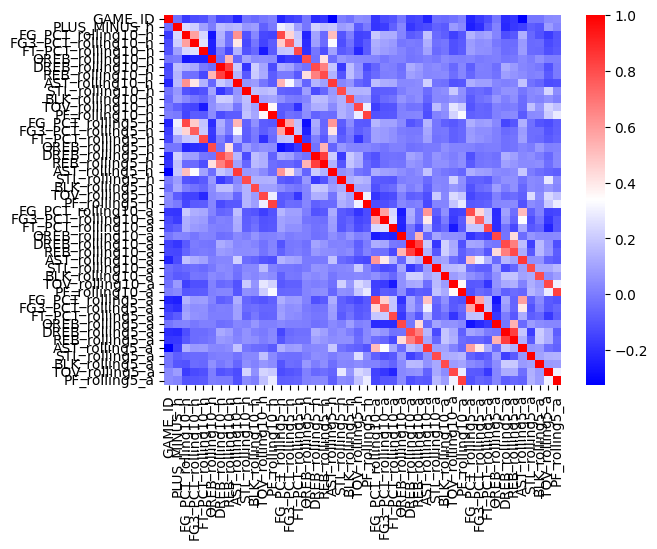

In [70]:
combined_df.drop(columns=['PLUS_MINUS_h'])

corr = combined_df.filter(regex='^(?!TEAM_ABBREVIATION)').corr() # Pearson Correlation

# Heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap= 'bwr')

In [71]:
corr_df = corr.stack().reset_index() # Unstack correlation matrix 

corr_df.columns = ['feature_1','feature_2', 'correlation'] # rename columns

corr_df.sort_values(by="correlation",ascending=False, inplace=True) # sort by correlation

corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] # Remove self correlation

corr_df.head(10)

,feature_1,feature_2,correlation
1916,AST_rolling5_a,AST_rolling10_a,0.852809
1421,AST_rolling10_a,AST_rolling5_a,0.852809
882,AST_rolling5_h,AST_rolling10_h,0.851516
387,AST_rolling10_h,AST_rolling5_h,0.851516
845,REB_rolling5_h,DREB_rolling5_h,0.835445
800,DREB_rolling5_h,REB_rolling5_h,0.835445
1879,REB_rolling5_a,DREB_rolling5_a,0.835225
1834,DREB_rolling5_a,REB_rolling5_a,0.835225
1317,DREB_rolling10_a,REB_rolling10_a,0.834562
1362,REB_rolling10_a,DREB_rolling10_a,0.834562


## X, y

In [ ]:
X = combined_df.drop(columns=['PLUS_MINUS_h'])
y = combined_df.PLUS_MINUS_h

In [ ]:
# X.drop(columns=['SEASON_ID', 'WL', 'MIN', 'MATCHUP', 'PTS', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'FTM', 'FTA', 'FGM', 'FGA', 'FG3M', 'FG3A'], inplace=True)

In [ ]:
X.drop(columns=['GAME_ID'], inplace=True)

In [ ]:
X.columns

In [ ]:
# X.to_pickle('X_basic_df_2022-09-01.pkl')

In [ ]:
# y.to_pickle('y_basic_df_2022-09-01.pkl')

In [ ]:
# X.to_pickle('X_basic_df_5yrs_preprocessed.pkl')

In [ ]:
# y.to_pickle('y_basic_df_5yrs_preprocessed.pkl')

In [ ]:
# X.to_pickle('X_basic_rolling_df_5yrs_preprocessed.pkl')

In [ ]:
# y.to_pickle('y_basic_rolling_df_5yrs_preprocessed.pkl')